# Imports

In [ ]:
import sys

import gseapy as gp
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns

sys.path.append("scripts")

from signatures_finalization import compute_gene_signature_correlations

# Expression analysis of primary signatures in 'GSE113883'"

In [2]:
ann = pd.read_csv("../data/annotations_filtred_for_corr.csv", index_col="Sample")
expr = pd.read_csv("../data/expression_for_corr_filtred.csv", index_col="Gene")

In [3]:
dataset = ["GSE113883"]
ann = ann[ann["Dataset"].isin(dataset)]
expr = expr
samples_GSE113883 = ann[ann["Dataset"] == "GSE113883"].index
expression_GSE113883 = expr[samples_GSE113883]

In [5]:
gene_sets = {
    "Cluster0": [
        "ABCA1",
        "AC007325.1",
        "ALOX5AP",
        "ANXA3",
        "AP5B1",
        "ARG1",
        "ASPH",
        "BCL2A1",
        "BMX",
        "C5AR1",
        "CA4",
        "CD177",
        "CLEC4D",
        "CLEC4E",
        "CSRNP1",
        "DUSP1",
        "FCAR",
        "FCER1G",
        "GAB2",
        "GABARAPL1",
        "GALNT14",
        "GCA",
        "IL1R2",
        "IRAK3",
        "LILRA5",
        "LRRN1",
        "MBD6",
        "MCEMP1",
        "NAIP",
        "NFIL3",
        "PGLYRP1",
        "PLAUR",
        "PLBD1",
        "POM121L7",
        "QPCT",
        "S100A12",
        "S100A8",
        "S100A9",
        "SAMSN1",
        "SLC26A8",
        "SOCS3",
        "TP53INP2",
        "VNN1",
    ],
    "Cluster0_1": [
        "ALOX5AP",
        "ANXA3",
        "ARG1",
        "BCL2A1",
        "BMX",
        "CA4",
        "CLEC4D",
        "CLEC4E",
        "FCAR",
        "FCER1G",
        "GCA",
        "IL1R2",
        "IRAK3",
        "LILRA5",
        "MCEMP1",
        "NFIL3",
    ],
    "Cluster0_2": [
        "ABCA1",
        "AP5B1",
        "C5AR1",
        "CSRNP1",
        "DUSP1",
        "GAB2",
        "GABARAPL1",
        "MBD6",
        "PLAUR",
        "SOCS3",
        "TP53INP2",
    ],
    "Cluster1": ["CXCL8", "G0S2", "CSTA"],
    "Cluster2": ["DAAM2", "GRB10", "OLAH"],
    "Cluster3": ["AIM2", "BATF2", "DHRS9", "FCGR1A", "FCGR1B", "LIPM", "TNFAIP6"],
    "Cluster4": ["ADGRG1", "BZRAP1", "ERBB2", "LIM2", "NMUR1", "TBX21"],
    "Cluster5": ["BPI", "COL17A1", "CRISP3", "DEFA3", "LCN2", "LTF", "MMP8", "MPO"],
    "Cluster6": ["GPR84", "HP"],
    "Cluster7": ["C1QA", "C1QB", "C1QC"],
}

In [ ]:
ss = gp.ssgsea(
    data=expr,
    gene_sets=gene_sets,
    sample_norm_method="rank",
    permutation_num=0,
    outdir=None,
    min_size=2,
)

ssgsea_scores = ss.res2d
ssgsea_scores = ssgsea_scores.pivot_table(index="Term", columns="Name", values="ES")
ssgsea_scores.columns.name = None
ssgsea_scores.index.name = None
ssgsea_scores = ssgsea_scores.apply(pd.to_numeric, errors="coerce")
ssgsea_scores.to_csv("../data/run_ssgsea_GSE1138833.csv")

In [ ]:
ssgsea_scores = pd.read_csv("../data/ssgsea_GSE113883.csv", index_col=0)

# Correlation of primary signatures with individual genes

In [ ]:
compute_gene_signature_correlations(
    expr=expression_GSE113883,
    ssgsea_scores=ssgsea_scores,
    signatures=ssgsea_scores.index.tolist(),
    output_file="../data/top_correlated_genes_GSE113883.csv",
    top_n=100,
    method="pearson",
    positive_only=True,
)

Results saved: ../data/top_correlated_genes_GSE113883.csv


In [ ]:
top = pd.read_csv("../data/top_correlated_genes_GSE113883.csv")
top.head()

,Signature,Gene,Correlation
0,Cluster0,IL1R2,0.8519
1,Cluster0,APMAP,0.8336
2,Cluster0,GLT1D1,0.8086
3,Cluster0,MMP25,0.7966
4,Cluster0,DGAT2,0.7860


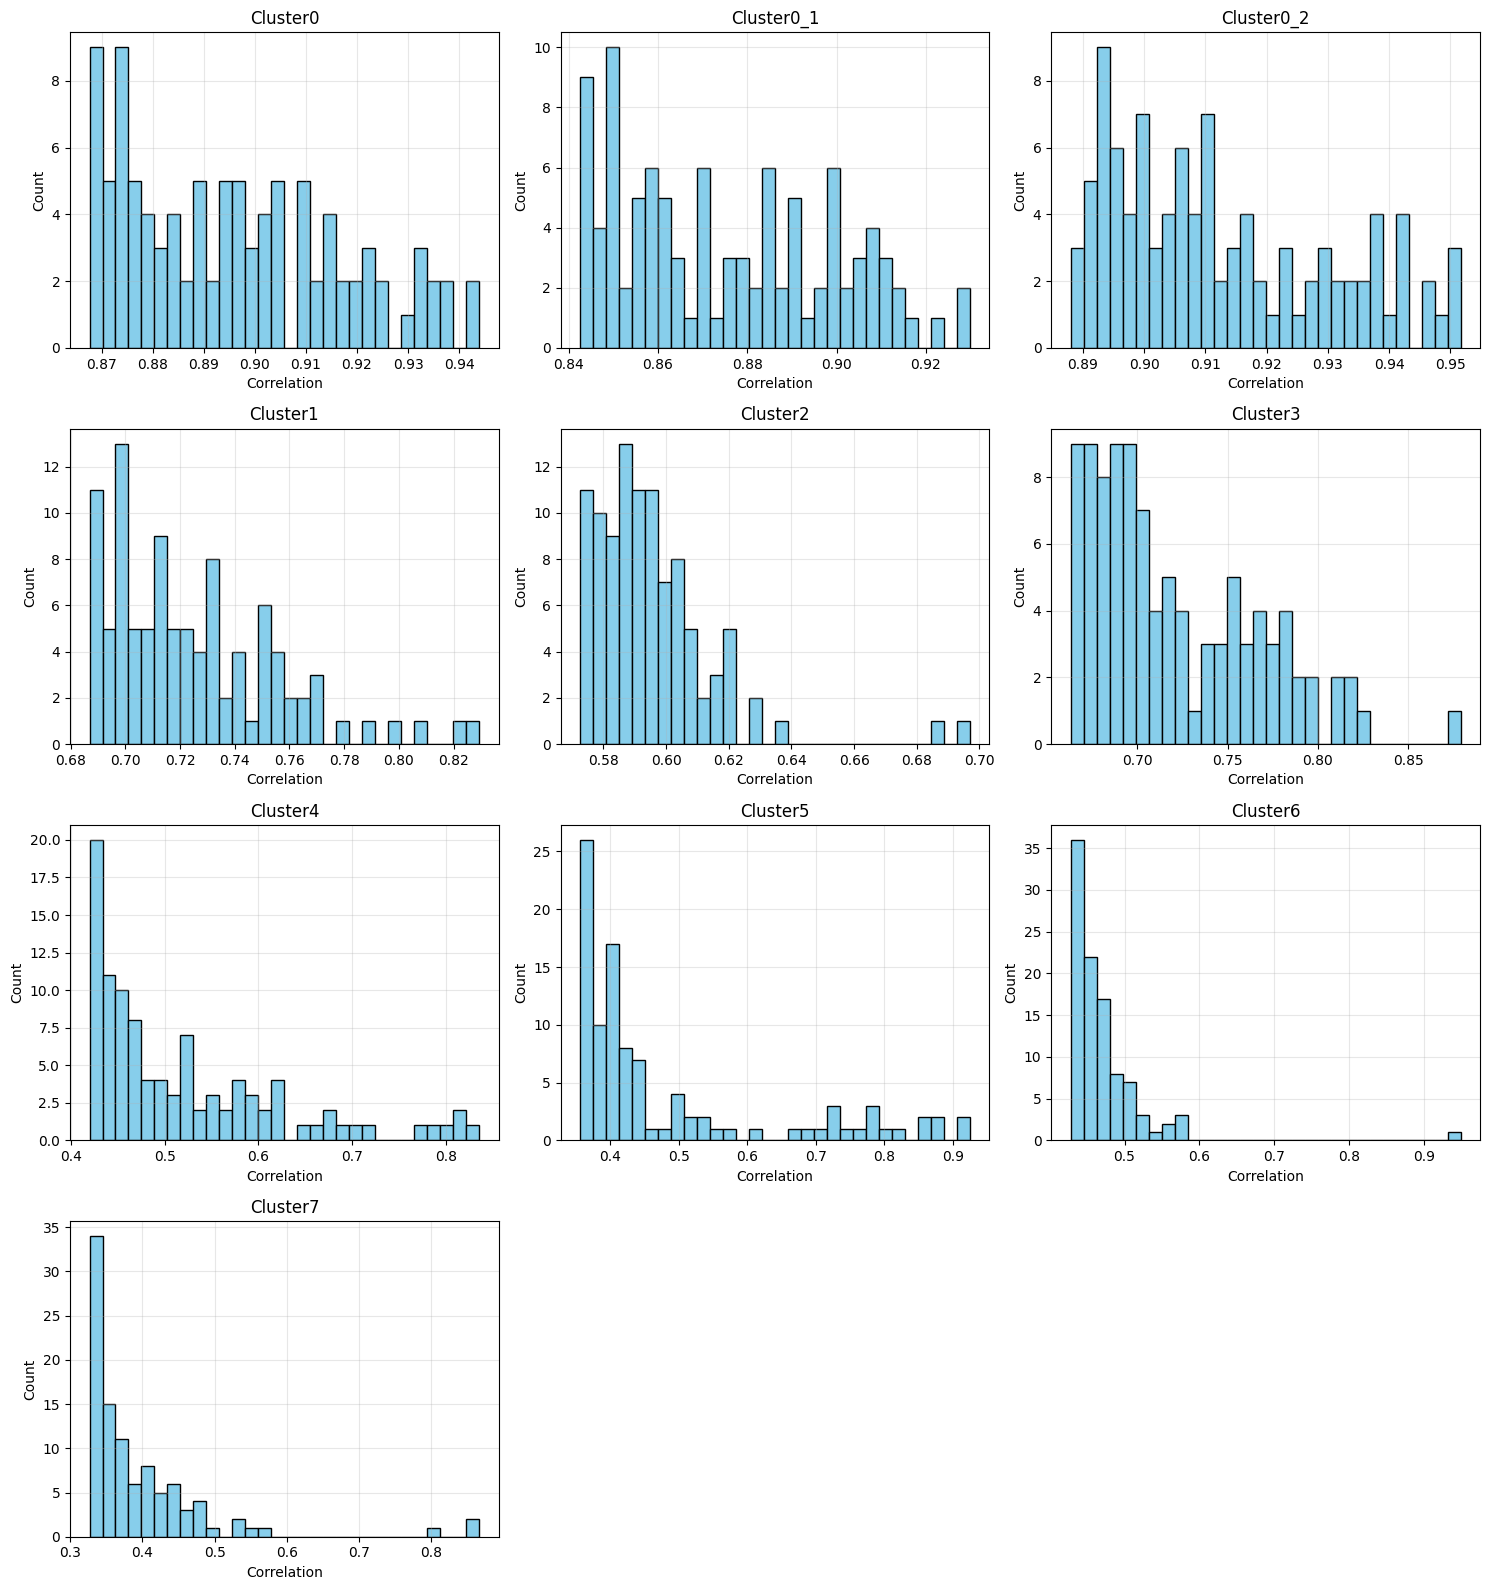

In [ ]:
signatures = top["Signature"].unique()

n_cols = 3
n_rows = (len(signatures) + n_cols - 1) // n_cols

fig, axes = plt.subplots(n_rows, n_cols, figsize=(n_cols * 5, n_rows * 4))
axes = axes.flatten()

for i, signature in enumerate(signatures):
    ax = axes[i]

    top_signature = top.query("Signature == @signature")
    top_signature_sorted = top_signature.sort_values(by="Correlation", ascending=False)
    top_signature_top100 = top_signature_sorted.head(100)

    ax.hist(
        top_signature_top100["Correlation"], bins=30, color="skyblue", edgecolor="black"
    )
    ax.set_title(f"{signature}")
    ax.set_xlabel("Correlation")
    ax.set_ylabel("Count")
    ax.grid(alpha=0.3)

for j in range(i + 1, len(axes)):
    fig.delaxes(axes[j])

plt.tight_layout()
plt.show()

# Expanding primary signatures by adding correlated genes

In [ ]:
top1 = top.query("(Signature == 'Cluster0') & (Correlation > 0.9)")
top1.Gene.unique()

array(['CXCR1', 'PILRA', 'RTN3', 'PYGL', 'AQP9', 'MSRB1', 'HCK', 'MNDA',
       'NFAM1', 'SRGN', 'NFIL3', 'DGAT2', 'NADK', 'PROK2', 'SLC22A4',
       'PFKFB4', 'TSEN34', 'APOBEC3A', 'GLT1D1', 'LILRA2', 'IL1B',
       'PLAUR', 'QPCT', 'BASP1', 'LRG1', 'CSF3R', 'SERPINA1', 'ADM',
       'NFE2', 'GCA', 'NCF4', 'PHC2', 'FRAT2', 'FFAR2', 'C5AR1', 'BST1',
       'IFNGR2', 'RGS2', 'FPR1', 'S100A9'], dtype=object)

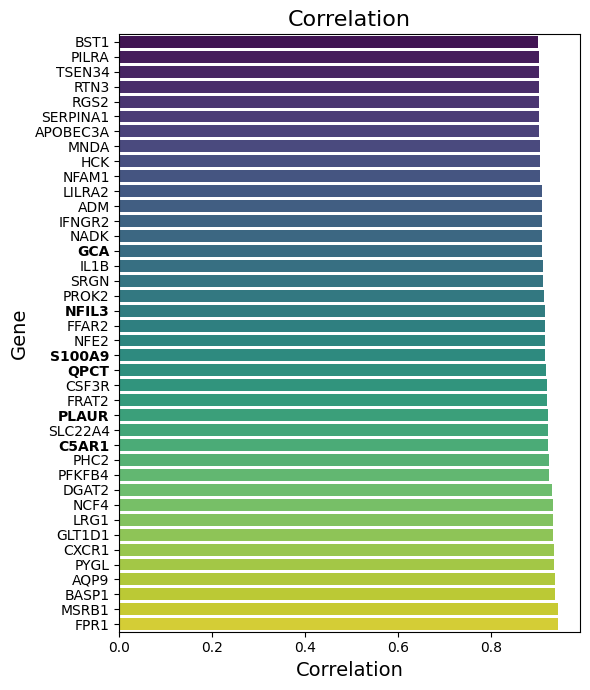

In [ ]:
corr_genes = [
    "CXCR1",
    "PILRA",
    "RTN3",
    "PYGL",
    "AQP9",
    "MSRB1",
    "HCK",
    "MNDA",
    "NFAM1",
    "SRGN",
    "NFIL3",
    "DGAT2",
    "NADK",
    "PROK2",
    "SLC22A4",
    "PFKFB4",
    "TSEN34",
    "APOBEC3A",
    "GLT1D1",
    "LILRA2",
    "IL1B",
    "PLAUR",
    "QPCT",
    "BASP1",
    "LRG1",
    "CSF3R",
    "SERPINA1",
    "ADM",
    "NFE2",
    "GCA",
    "NCF4",
    "PHC2",
    "FRAT2",
    "FFAR2",
    "C5AR1",
    "BST1",
    "IFNGR2",
    "RGS2",
    "FPR1",
    "S100A9",
]

primary_genes = [
    "ABCA1",
    "AC007325.1",
    "ALOX5AP",
    "ANXA3",
    "AP5B1",
    "ARG1",
    "ASPH",
    "BCL2A1",
    "BMX",
    "C5AR1",
    "CA4",
    "CD177",
    "CLEC4D",
    "CLEC4E",
    "CSRNP1",
    "DUSP1",
    "FCAR",
    "FCER1G",
    "GAB2",
    "GABARAPL1",
    "GALNT14",
    "GCA",
    "IL1R2",
    "IRAK3",
    "LILRA5",
    "LRRN1",
    "MBD6",
    "MCEMP1",
    "NAIP",
    "NFIL3",
    "PGLYRP1",
    "PLAUR",
    "PLBD1",
    "POM121L7",
    "QPCT",
    "S100A12",
    "S100A8",
    "S100A9",
    "SAMSN1",
    "SLC26A8",
    "SOCS3",
    "TP53INP2",
]

filtered_data = top1[top1["Gene"].isin(corr_genes)]

filtered_data_sorted = filtered_data.sort_values(by="Correlation", ascending=True)

plt.figure(figsize=(6, 7))
sns.barplot(
    x="Correlation",
    y="Gene",
    data=filtered_data_sorted,
    hue="Gene",
    palette="viridis",
    legend=False,
)

plt.title("Correlation", fontsize=16)
plt.xlabel("Correlation", fontsize=14)
plt.ylabel("Gene", fontsize=14)

ax = plt.gca()
for label in ax.get_yticklabels():
    gene_name = label.get_text()
    if gene_name in primary_genes:
        label.set_fontweight("bold")

plt.tight_layout()
plt.show()

In [ ]:
final_signature = list(set(corr_genes + primary_genes))
print(", ".join(f"'{gene}'" for gene in final_signature))

'QPCT', 'LRG1', 'BMX', 'FCAR', 'NFIL3', 'HCK', 'ANXA3', 'IL1R2', 'FCER1G', 'FPR1', 'MSRB1', 'TSEN34', 'AP5B1', 'PYGL', 'FFAR2', 'SRGN', 'PLAUR', 'CLEC4D', 'CSRNP1', 'IRAK3', 'ADM', 'RGS2', 'PGLYRP1', 'IFNGR2', 'TP53INP2', 'AQP9', 'LILRA5', 'NAIP', 'MNDA', 'C5AR1', 'CD177', 'SOCS3', 'GABARAPL1', 'BCL2A1', 'NCF4', 'SAMSN1', 'CA4', 'AC007325.1', 'LRRN1', 'PFKFB4', 'PLBD1', 'ALOX5AP', 'MCEMP1', 'SLC22A4', 'GCA', 'NFAM1', 'GALNT14', 'S100A9', 'RTN3', 'FRAT2', 'POM121L7', 'PILRA', 'CLEC4E', 'IL1B', 'S100A12', 'SLC26A8', 'DUSP1', 'MBD6', 'BASP1', 'ARG1', 'CSF3R', 'BST1', 'ASPH', 'GAB2', 'LILRA2', 'S100A8', 'GLT1D1', 'NFE2', 'SERPINA1', 'ABCA1', 'PHC2', 'PROK2', 'CXCR1', 'NADK', 'DGAT2', 'APOBEC3A'


In [ ]:
top2 = top.query("(Signature == 'Cluster0_1') & (Correlation > 0.9)")
top2.Gene.unique()

array(['CXCR1', 'PYGL', 'AQP9', 'MSRB1', 'MNDA', 'SRGN', 'GLT1D1',
       'LILRA2', 'PLAUR', 'BASP1', 'LRG1', 'BCL2A1', 'GCA', 'NCF4',
       'FRAT2', 'S100A8', 'BST1', 'IFNGR2', 'RGS2', 'FPR1', 'S100A9'],
      dtype=object)

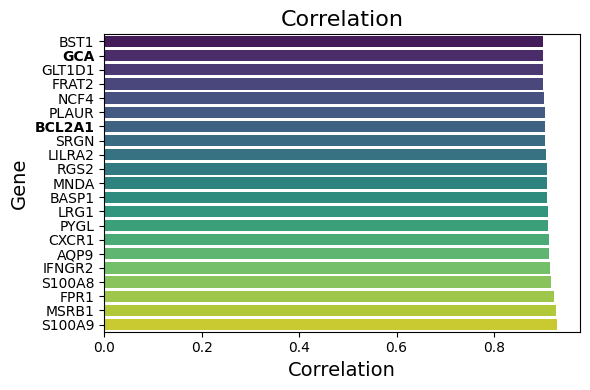

In [ ]:
corr_genes = [
    "CXCR1",
    "PYGL",
    "AQP9",
    "MSRB1",
    "MNDA",
    "SRGN",
    "GLT1D1",
    "LILRA2",
    "PLAUR",
    "BASP1",
    "LRG1",
    "BCL2A1",
    "GCA",
    "NCF4",
    "FRAT2",
    "S100A8",
    "BST1",
    "IFNGR2",
    "RGS2",
    "FPR1",
    "S100A9",
]

primary_genes = [
    "ALOX5AP",
    "ANXA3",
    "ARG1",
    "BCL2A1",
    "BMX",
    "CA4",
    "CLEC4D",
    "CLEC4E",
    "FCAR",
    "FCER1G",
    "GCA",
    "IL1R2",
    "IRAK3",
    "LILRA5",
    "MCEMP1",
    "NFIL3",
]

filtered_data = top2[top2["Gene"].isin(corr_genes)]

filtered_data_sorted = filtered_data.sort_values(by="Correlation", ascending=True)

plt.figure(figsize=(6, 4))
sns.barplot(
    x="Correlation",
    y="Gene",
    data=filtered_data_sorted,
    hue="Gene",
    palette="viridis",
    legend=False,
)

plt.title("Correlation", fontsize=16)
plt.xlabel("Correlation", fontsize=14)
plt.ylabel("Gene", fontsize=14)


ax = plt.gca()
for label in ax.get_yticklabels():
    gene_name = label.get_text()
    if gene_name in primary_genes:
        label.set_fontweight("bold")

plt.tight_layout()
plt.show()

In [ ]:
final_signature = list(set(corr_genes + primary_genes))
print(", ".join(f"'{gene}'" for gene in final_signature))

'LRG1', 'BMX', 'FCAR', 'NFIL3', 'ANXA3', 'IL1R2', 'FCER1G', 'FPR1', 'MSRB1', 'PYGL', 'SRGN', 'PLAUR', 'CLEC4D', 'IRAK3', 'RGS2', 'IFNGR2', 'AQP9', 'LILRA5', 'MNDA', 'BCL2A1', 'NCF4', 'CA4', 'ALOX5AP', 'MCEMP1', 'GCA', 'S100A9', 'FRAT2', 'CLEC4E', 'BASP1', 'ARG1', 'BST1', 'LILRA2', 'S100A8', 'GLT1D1', 'CXCR1'


In [ ]:
top3 = top.query("(Signature == 'Cluster0_2') & (Correlation > 0.9)")
top3.Gene.unique()

array(['CXCR1', 'HLX', 'PYGL', 'ADAM8', 'FAM214B', 'TNFRSF10C', 'AQP9',
       'LPPR2', 'MSRB1', 'PLEKHO2', 'BCL6', 'C5AR2', 'ITGAX', 'TREM1',
       'CSF2RB', 'HCK', 'HCAR2', 'NFAM1', 'KDM6B', 'PDLIM7', 'DGAT2',
       'NADK', 'ALOX5', 'TUBA1A', 'HSPA6', 'RNF19B', 'ARRB2', 'SLC22A4',
       'MMP25', 'PFKFB4', 'SLC43A2', 'DOK3', 'TSEN34', 'ADGRG3', 'LIMK2',
       'XPO6', 'FRAT1', 'C19orf35', 'GLT1D1', 'ARHGAP27', 'NBEAL2',
       'STK40', 'SPI1', 'PLAUR', 'PPP1R15A', 'ZDHHC18', 'ALPL', 'BASP1',
       'LRG1', 'PTAFR', 'C15orf39', 'KCNJ15', 'LRRC25', 'SOD2', 'CSF3R',
       'PLIN5', 'NFE2', 'AP5B1', 'CCNJL', 'NCF4', 'PHC2', 'MYO1F',
       'FRAT2', 'FFAR2', 'DUSP1', 'C5AR1', 'DENND3', 'FPR1'], dtype=object)

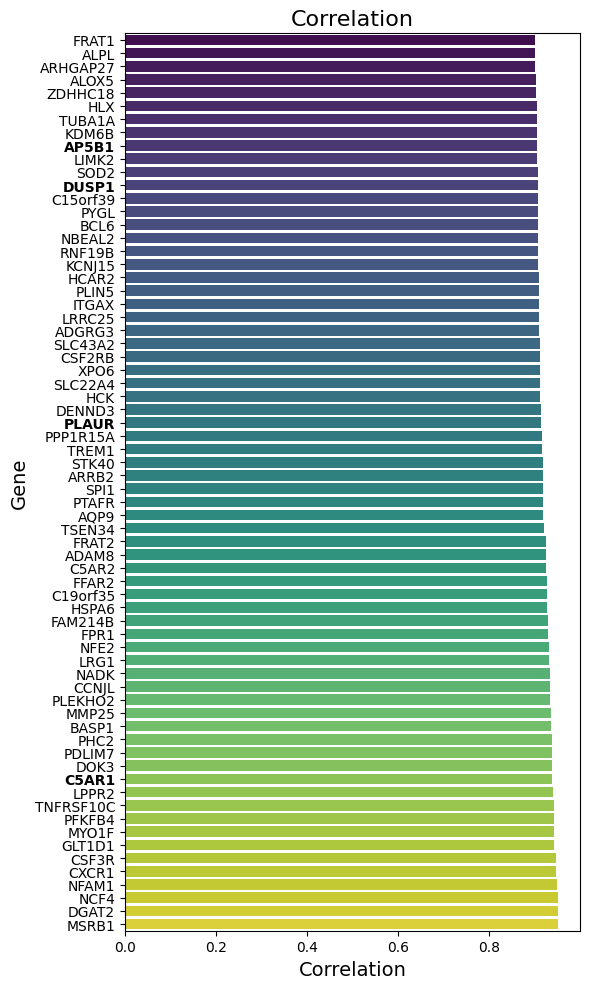

In [ ]:
corr_genes = [
    "CXCR1",
    "HLX",
    "PYGL",
    "ADAM8",
    "FAM214B",
    "TNFRSF10C",
    "AQP9",
    "LPPR2",
    "MSRB1",
    "PLEKHO2",
    "BCL6",
    "C5AR2",
    "ITGAX",
    "TREM1",
    "CSF2RB",
    "HCK",
    "HCAR2",
    "NFAM1",
    "KDM6B",
    "PDLIM7",
    "DGAT2",
    "NADK",
    "ALOX5",
    "TUBA1A",
    "HSPA6",
    "RNF19B",
    "ARRB2",
    "SLC22A4",
    "MMP25",
    "PFKFB4",
    "SLC43A2",
    "DOK3",
    "TSEN34",
    "ADGRG3",
    "LIMK2",
    "XPO6",
    "FRAT1",
    "C19orf35",
    "GLT1D1",
    "ARHGAP27",
    "NBEAL2",
    "STK40",
    "SPI1",
    "PLAUR",
    "PPP1R15A",
    "ZDHHC18",
    "ALPL",
    "BASP1",
    "LRG1",
    "PTAFR",
    "C15orf39",
    "KCNJ15",
    "LRRC25",
    "SOD2",
    "CSF3R",
    "PLIN5",
    "NFE2",
    "AP5B1",
    "CCNJL",
    "NCF4",
    "PHC2",
    "MYO1F",
    "FRAT2",
    "FFAR2",
    "DUSP1",
    "C5AR1",
    "DENND3",
    "FPR1",
]

primary_genes = [
    "ABCA1",
    "AP5B1",
    "C5AR1",
    "CSRNP1",
    "DUSP1",
    "GAB2",
    "GABARAPL1",
    "MBD6",
    "PLAUR",
    "SOCS3",
    "TP53INP2",
]

filtered_data = top3[top3["Gene"].isin(corr_genes)]

filtered_data_sorted = filtered_data.sort_values(by="Correlation", ascending=True)

plt.figure(figsize=(6, 10))
sns.barplot(
    x="Correlation",
    y="Gene",
    data=filtered_data_sorted,
    hue="Gene",
    palette="viridis",
    legend=False,
)

plt.title("Correlation", fontsize=16)
plt.xlabel("Correlation", fontsize=14)
plt.ylabel("Gene", fontsize=14)

ax = plt.gca()
for label in ax.get_yticklabels():
    gene_name = label.get_text()
    if gene_name in primary_genes:
        label.set_fontweight("bold")

plt.tight_layout()
plt.show()

In [ ]:
final_signature = list(set(corr_genes + primary_genes))
print(", ".join(f"'{gene}'" for gene in final_signature))

'LRG1', 'PPP1R15A', 'ARHGAP27', 'ALOX5', 'SOD2', 'HCK', 'HLX', 'TUBA1A', 'NBEAL2', 'LIMK2', 'FPR1', 'MSRB1', 'TSEN34', 'AP5B1', 'PYGL', 'FFAR2', 'LPPR2', 'ALPL', 'MYO1F', 'PLAUR', 'CSRNP1', 'MMP25', 'PDLIM7', 'ITGAX', 'TP53INP2', 'PLEKHO2', 'AQP9', 'SPI1', 'TREM1', 'C5AR1', 'LRRC25', 'SOCS3', 'DENND3', 'GABARAPL1', 'BCL6', 'NCF4', 'SLC43A2', 'CSF2RB', 'C15orf39', 'ADAM8', 'HSPA6', 'DOK3', 'ADGRG3', 'PFKFB4', 'KCNJ15', 'C5AR2', 'FRAT1', 'FAM214B', 'SLC22A4', 'HCAR2', 'NFAM1', 'TNFRSF10C', 'FRAT2', 'KDM6B', 'RNF19B', 'DUSP1', 'XPO6', 'BASP1', 'MBD6', 'PTAFR', 'CSF3R', 'GAB2', 'GLT1D1', 'ARRB2', 'STK40', 'NFE2', 'ABCA1', 'PLIN5', 'ZDHHC18', 'CCNJL', 'C19orf35', 'PHC2', 'CXCR1', 'NADK', 'DGAT2'


In [ ]:
top4 = top.query("(Signature == 'Cluster1') & (Correlation > 0.77)")
top4.Gene.unique()

array(['ALOX5AP', 'CXCL1', 'SRGN', 'CXCL8', 'CKLF', 'IFNGR2', 'RGS2'],
      dtype=object)

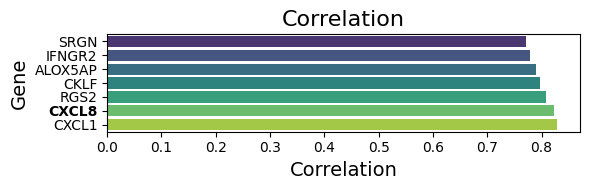

In [ ]:
corr_genes = ["ALOX5AP", "CXCL1", "SRGN", "CXCL8", "CKLF", "IFNGR2", "RGS2"]

primary_genes = ["CXCL8", "G0S2", "CSTA"]

filtered_data = top4[top4["Gene"].isin(corr_genes)]

filtered_data_sorted = filtered_data.sort_values(by="Correlation", ascending=True)

plt.figure(figsize=(6, 2))
sns.barplot(
    x="Correlation",
    y="Gene",
    data=filtered_data_sorted,
    hue="Gene",
    palette="viridis",
    legend=False,
)

plt.title("Correlation", fontsize=16)
plt.xlabel("Correlation", fontsize=14)
plt.ylabel("Gene", fontsize=14)

ax = plt.gca()
for label in ax.get_yticklabels():
    gene_name = label.get_text()
    if gene_name in primary_genes:
        label.set_fontweight("bold")

plt.tight_layout()
plt.show()

In [ ]:
final_signature = list(set(corr_genes + primary_genes))
print(", ".join(f"'{gene}'" for gene in final_signature))

'IFNGR2', 'ALOX5AP', 'CSTA', 'CKLF', 'CXCL8', 'G0S2', 'SRGN', 'RGS2', 'CXCL1'


In [ ]:
top5 = top.query("(Signature == 'Cluster2') & (Correlation > 0.6)")
top5.Gene.unique()

array(['ALOX5AP', 'CRISPLD2', 'DOCK5', 'HAL', 'FAM212B', 'AQP9', 'TREM1',
       'DAAM2', 'VNN3', 'CAMKK1', 'NFIL3', 'DGAT2', 'MRVI1', 'PFKFB4',
       'IL1R2', 'CEACAM4', 'REPS2', 'MANSC1', 'OLAH', 'MGAM', 'PADI4',
       'CHST15', 'ERGIC1', 'CSF3R', 'CYP4F3', 'CCNJL', 'PHC2', 'FRAT2',
       'C5AR1', 'RGS2', 'IL1R1', 'NSUN7'], dtype=object)

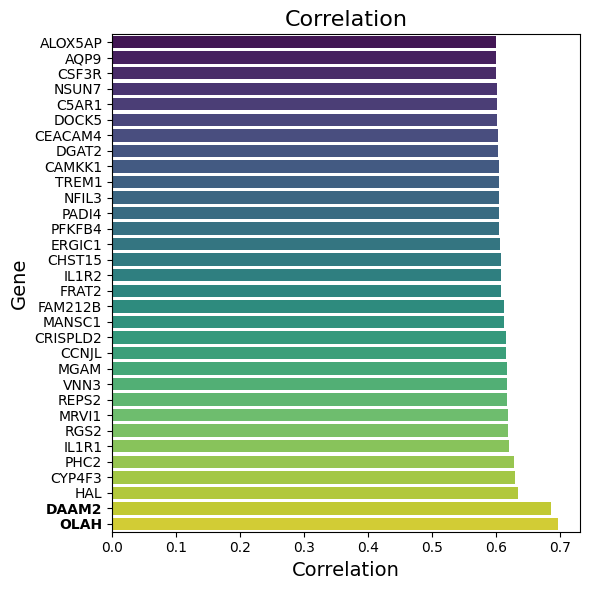

In [ ]:
corr_genes = [
    "ALOX5AP",
    "CRISPLD2",
    "DOCK5",
    "HAL",
    "FAM212B",
    "AQP9",
    "TREM1",
    "DAAM2",
    "VNN3",
    "CAMKK1",
    "NFIL3",
    "DGAT2",
    "MRVI1",
    "PFKFB4",
    "IL1R2",
    "CEACAM4",
    "REPS2",
    "MANSC1",
    "OLAH",
    "MGAM",
    "PADI4",
    "CHST15",
    "ERGIC1",
    "CSF3R",
    "CYP4F3",
    "CCNJL",
    "PHC2",
    "FRAT2",
    "C5AR1",
    "RGS2",
    "IL1R1",
    "NSUN7",
]

primary_genes = ["DAAM2", "GRB10", "OLAH"]

filtered_data = top5[top5["Gene"].isin(corr_genes)]

filtered_data_sorted = filtered_data.sort_values(by="Correlation", ascending=True)

plt.figure(figsize=(6, 6))
sns.barplot(
    x="Correlation",
    y="Gene",
    data=filtered_data_sorted,
    hue="Gene",
    palette="viridis",
    legend=False,
)

plt.title("Correlation", fontsize=16)
plt.xlabel("Correlation", fontsize=14)
plt.ylabel("Gene", fontsize=14)

ax = plt.gca()
for label in ax.get_yticklabels():
    gene_name = label.get_text()
    if gene_name in primary_genes:
        label.set_fontweight("bold")

plt.tight_layout()
plt.show()

In [ ]:
final_signature = list(set(corr_genes + primary_genes))
print(", ".join(f"'{gene}'" for gene in final_signature))

'OLAH', 'NFIL3', 'DAAM2', 'IL1R2', 'ERGIC1', 'MANSC1', 'REPS2', 'RGS2', 'NSUN7', 'VNN3', 'AQP9', 'TREM1', 'CYP4F3', 'C5AR1', 'CRISPLD2', 'MGAM', 'MRVI1', 'PFKFB4', 'FAM212B', 'ALOX5AP', 'PADI4', 'FRAT2', 'DOCK5', 'CSF3R', 'CEACAM4', 'IL1R1', 'CAMKK1', 'GRB10', 'HAL', 'CCNJL', 'PHC2', 'CHST15', 'DGAT2'


In [ ]:
top6 = top.query("(Signature == 'Cluster3') & (Correlation > 0.75)")
top6.Gene.unique()

array(['FCGR1B', 'FCGR1A', 'IFIT1', 'BATF2', 'SERPING1', 'TRAFD1',
       'IFIT2', 'ZNF438', 'PARP9', 'APOBEC3A', 'TNFAIP6', 'IFIT3',
       'SECTM1', 'IL1B', 'CLIC1', 'CARD16', 'NMI', 'IL1RN', 'BCL2A1',
       'ANKRD22', 'ADM', 'DYNLT1', 'CASP1', 'S100A8', 'FFAR2', 'SQRDL',
       'TRIM21', 'TNFSF10'], dtype=object)

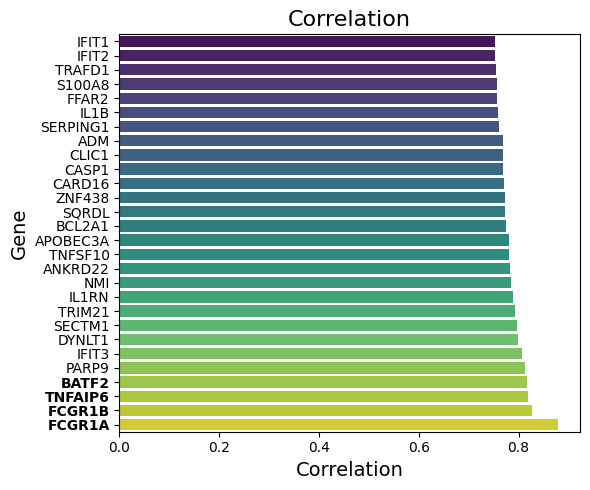

In [ ]:
corr_genes = [
    "FCGR1B",
    "FCGR1A",
    "IFIT1",
    "BATF2",
    "SERPING1",
    "TRAFD1",
    "IFIT2",
    "ZNF438",
    "PARP9",
    "APOBEC3A",
    "TNFAIP6",
    "IFIT3",
    "SECTM1",
    "IL1B",
    "CLIC1",
    "CARD16",
    "NMI",
    "IL1RN",
    "BCL2A1",
    "ANKRD22",
    "ADM",
    "DYNLT1",
    "CASP1",
    "S100A8",
    "FFAR2",
    "SQRDL",
    "TRIM21",
    "TNFSF10",
]

primary_genes = ["AIM2", "BATF2", "DHRS9", "FCGR1A", "FCGR1B", "LIPM", "TNFAIP6"]

filtered_data = top6[top6["Gene"].isin(corr_genes)]

filtered_data_sorted = filtered_data.sort_values(by="Correlation", ascending=True)

plt.figure(figsize=(6, 5))
sns.barplot(
    x="Correlation",
    y="Gene",
    data=filtered_data_sorted,
    hue="Gene",
    palette="viridis",
    legend=False,
)

plt.title("Correlation", fontsize=16)
plt.xlabel("Correlation", fontsize=14)
plt.ylabel("Gene", fontsize=14)

ax = plt.gca()
for label in ax.get_yticklabels():
    gene_name = label.get_text()
    if gene_name in primary_genes:
        label.set_fontweight("bold")

plt.tight_layout()
plt.show()

In [ ]:
final_signature = list(set(corr_genes + primary_genes))
print(", ".join(f"'{gene}'" for gene in final_signature))

'CARD16', 'NMI', 'TRIM21', 'IFIT1', 'FFAR2', 'IFIT2', 'ZNF438', 'ADM', 'IFIT3', 'SERPING1', 'BCL2A1', 'CLIC1', 'FCGR1A', 'DHRS9', 'LIPM', 'PARP9', 'ANKRD22', 'IL1B', 'TNFAIP6', 'DYNLT1', 'TRAFD1', 'SECTM1', 'AIM2', 'SQRDL', 'TNFSF10', 'S100A8', 'IL1RN', 'FCGR1B', 'BATF2', 'CASP1', 'APOBEC3A'


In [ ]:
top7 = top.query("(Signature == 'Cluster4') & (Correlation > 0.65)")
top7.Gene.unique()

array(['ERBB2', 'BZRAP1', 'NMUR1', 'PRSS23', 'TBX21', 'LIM2', 'SPON2',
       'B3GAT1', 'PRF1', 'MLC1', 'S1PR5', 'FGFBP2'], dtype=object)

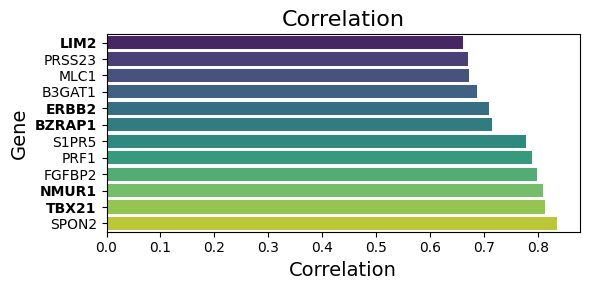

In [ ]:
corr_genes = [
    "ERBB2",
    "BZRAP1",
    "NMUR1",
    "PRSS23",
    "TBX21",
    "LIM2",
    "SPON2",
    "B3GAT1",
    "PRF1",
    "MLC1",
    "S1PR5",
    "FGFBP2",
]

primary_genes = ["ADGRG1", "BZRAP1", "ERBB2", "LIM2", "NMUR1", "TBX21"]

filtered_data = top7[top7["Gene"].isin(corr_genes)]

filtered_data_sorted = filtered_data.sort_values(by="Correlation", ascending=True)

plt.figure(figsize=(6, 3))
sns.barplot(
    x="Correlation",
    y="Gene",
    data=filtered_data_sorted,
    hue="Gene",
    palette="viridis",
    legend=False,
)

plt.title("Correlation", fontsize=16)
plt.xlabel("Correlation", fontsize=14)
plt.ylabel("Gene", fontsize=14)

ax = plt.gca()
for label in ax.get_yticklabels():
    gene_name = label.get_text()
    if gene_name in primary_genes:
        label.set_fontweight("bold")

plt.tight_layout()
plt.show()

In [ ]:
final_signature = list(set(corr_genes + primary_genes))
print(", ".join(f"'{gene}'" for gene in final_signature))

'FGFBP2', 'BZRAP1', 'ADGRG1', 'ERBB2', 'TBX21', 'MLC1', 'LIM2', 'SPON2', 'NMUR1', 'B3GAT1', 'PRSS23', 'PRF1', 'S1PR5'


In [ ]:
top8 = top.query("(Signature == 'Cluster5') & (Correlation > 0.65)")
top8.Gene.unique()

array(['CEACAM6', 'MMP8', 'CEACAM8', 'RNASE3', 'DEFA4', 'LTF', 'BPI',
       'PRTN3', 'OLFM4', 'COL17A1', 'CAMP', 'DEFA1', 'CRISP3', 'DEFA3',
       'MPO', 'LCN2', 'ELANE', 'AZU1', 'CTSG'], dtype=object)

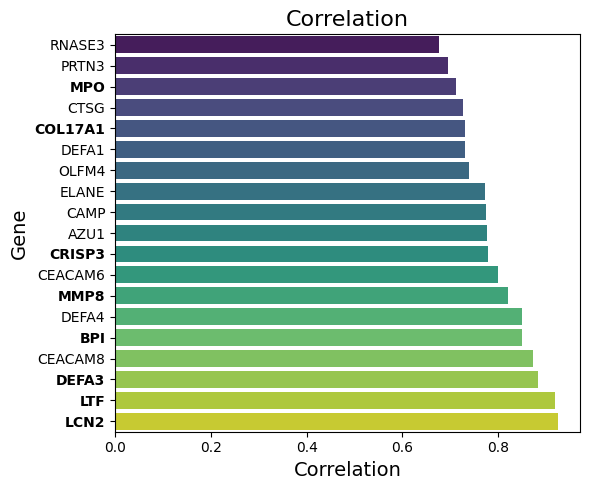

In [ ]:
corr_genes = [
    "CEACAM6",
    "MMP8",
    "CEACAM8",
    "RNASE3",
    "DEFA4",
    "LTF",
    "BPI",
    "PRTN3",
    "OLFM4",
    "COL17A1",
    "CAMP",
    "DEFA1",
    "CRISP3",
    "DEFA3",
    "MPO",
    "LCN2",
    "ELANE",
    "AZU1",
    "CTSG",
]

primary_genes = ["BPI", "COL17A1", "CRISP3", "DEFA3", "LCN2", "LTF", "MMP8", "MPO"]

filtered_data = top8[top8["Gene"].isin(corr_genes)]

filtered_data_sorted = filtered_data.sort_values(by="Correlation", ascending=True)

plt.figure(figsize=(6, 5))
sns.barplot(
    x="Correlation",
    y="Gene",
    data=filtered_data_sorted,
    hue="Gene",
    palette="viridis",
    legend=False,
)

plt.title("Correlation", fontsize=16)
plt.xlabel("Correlation", fontsize=14)
plt.ylabel("Gene", fontsize=14)

ax = plt.gca()
for label in ax.get_yticklabels():
    gene_name = label.get_text()
    if gene_name in primary_genes:
        label.set_fontweight("bold")

plt.tight_layout()
plt.show()

In [ ]:
final_signature = list(set(corr_genes + primary_genes))
print(", ".join(f"'{gene}'" for gene in final_signature))

'COL17A1', 'DEFA3', 'LTF', 'DEFA1', 'LCN2', 'BPI', 'RNASE3', 'ELANE', 'CAMP', 'DEFA4', 'AZU1', 'CEACAM8', 'OLFM4', 'CRISP3', 'PRTN3', 'MMP8', 'MPO', 'CEACAM6', 'CTSG'


In [ ]:
top9 = top.query("(Signature == 'Cluster6') & (Correlation > 0.55)")
top9.Gene.unique()

array(['MCEMP1', 'S100A12', 'GPR84', 'S100A8', 'HP', 'S100A9'],
      dtype=object)

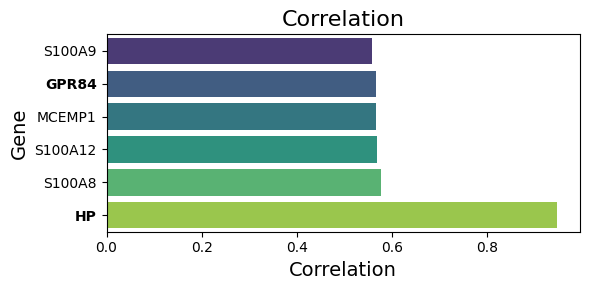

In [ ]:
corr_genes = ["MCEMP1", "S100A12", "GPR84", "S100A8", "HP", "S100A9"]

primary_genes = ["GPR84", "HP"]

filtered_data = top9[top9["Gene"].isin(corr_genes)]

filtered_data_sorted = filtered_data.sort_values(by="Correlation", ascending=True)

plt.figure(figsize=(6, 3))
sns.barplot(
    x="Correlation",
    y="Gene",
    data=filtered_data_sorted,
    hue="Gene",
    palette="viridis",
    legend=False,
)

plt.title("Correlation", fontsize=16)
plt.xlabel("Correlation", fontsize=14)
plt.ylabel("Gene", fontsize=14)

ax = plt.gca()
for label in ax.get_yticklabels():
    gene_name = label.get_text()
    if gene_name in primary_genes:
        label.set_fontweight("bold")

plt.tight_layout()
plt.show()

In [ ]:
final_signature = list(set(corr_genes + primary_genes))
print(", ".join(f"'{gene}'" for gene in final_signature))

'GPR84', 'MCEMP1', 'S100A8', 'S100A9', 'HP', 'S100A12'


In [ ]:
top10 = top.query("(Signature == 'Cluster7') & (Correlation > 0.6)")
top10.Gene.unique()

array(['C1QB', 'C1QC', 'C1QA'], dtype=object)

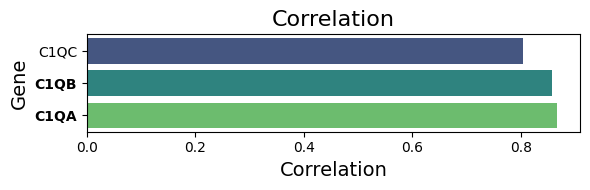

In [ ]:
corr_genes = ["C1QB", "C1QC", "C1QA"]

primary_genes = ["C1QA", "C1QB"]

filtered_data = top10[top10["Gene"].isin(corr_genes)]

filtered_data_sorted = filtered_data.sort_values(by="Correlation", ascending=True)

plt.figure(figsize=(6, 2))
sns.barplot(
    x="Correlation",
    y="Gene",
    data=filtered_data_sorted,
    hue="Gene",
    palette="viridis",
    legend=False,
)

plt.title("Correlation", fontsize=16)
plt.xlabel("Correlation", fontsize=14)
plt.ylabel("Gene", fontsize=14)

ax = plt.gca()
for label in ax.get_yticklabels():
    gene_name = label.get_text()
    if gene_name in primary_genes:
        label.set_fontweight("bold")

plt.tight_layout()
plt.show()

In [ ]:
final_signature = list(set(corr_genes + primary_genes))
print(", ".join(f"'{gene}'" for gene in final_signature))

'C1QB', 'C1QC', 'C1QA'
